### SEABORN AND REGRESSION PLOTS

In [148]:
import pandas as pd
import seaborn as sns

In [150]:
df_canada = pd.read_csv("/Users/cansezgin/Python-Output/canadian_immegration_data.csv")

In [152]:
df_canada.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [154]:
# Define the list of years as strings
years = list(map(str, range(1980, 2014)))

# Create df_total: total immigrants to Canada per year
df_total = pd.DataFrame({
    'Year': list(map(int, years)),  # convert to int for cleaner plotting
    'Total': df_canada[years].sum(axis=0).values  # sum across all countries
})

# Display the result
print(df_total.head())

   Year   Total
0  1980   99137
1  1981  110563
2  1982  104271
3  1983   75550
4  1984   73417


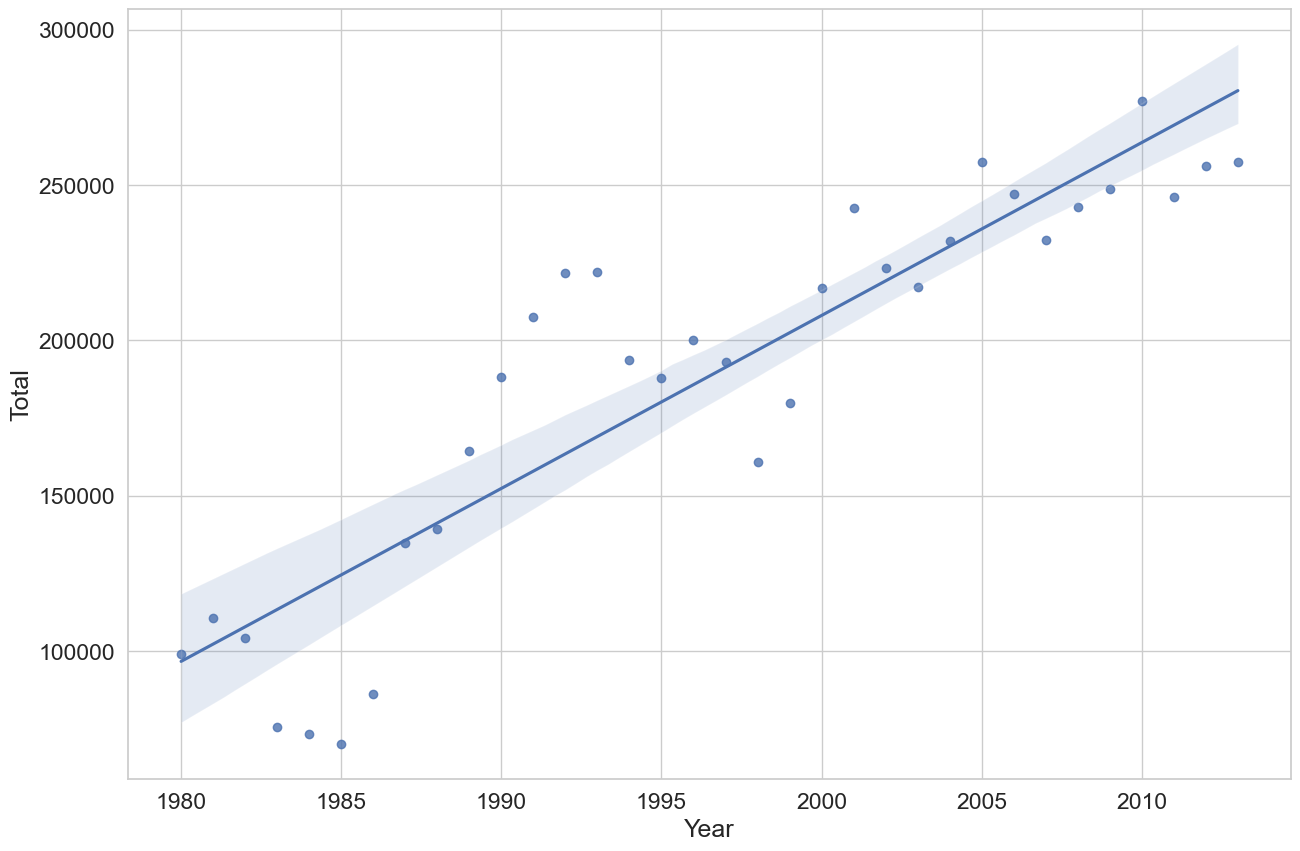

In [156]:
plt.figure(figsize=(15,10))
ax = sns.regplot(x='Year', y='Total', data=df_total)

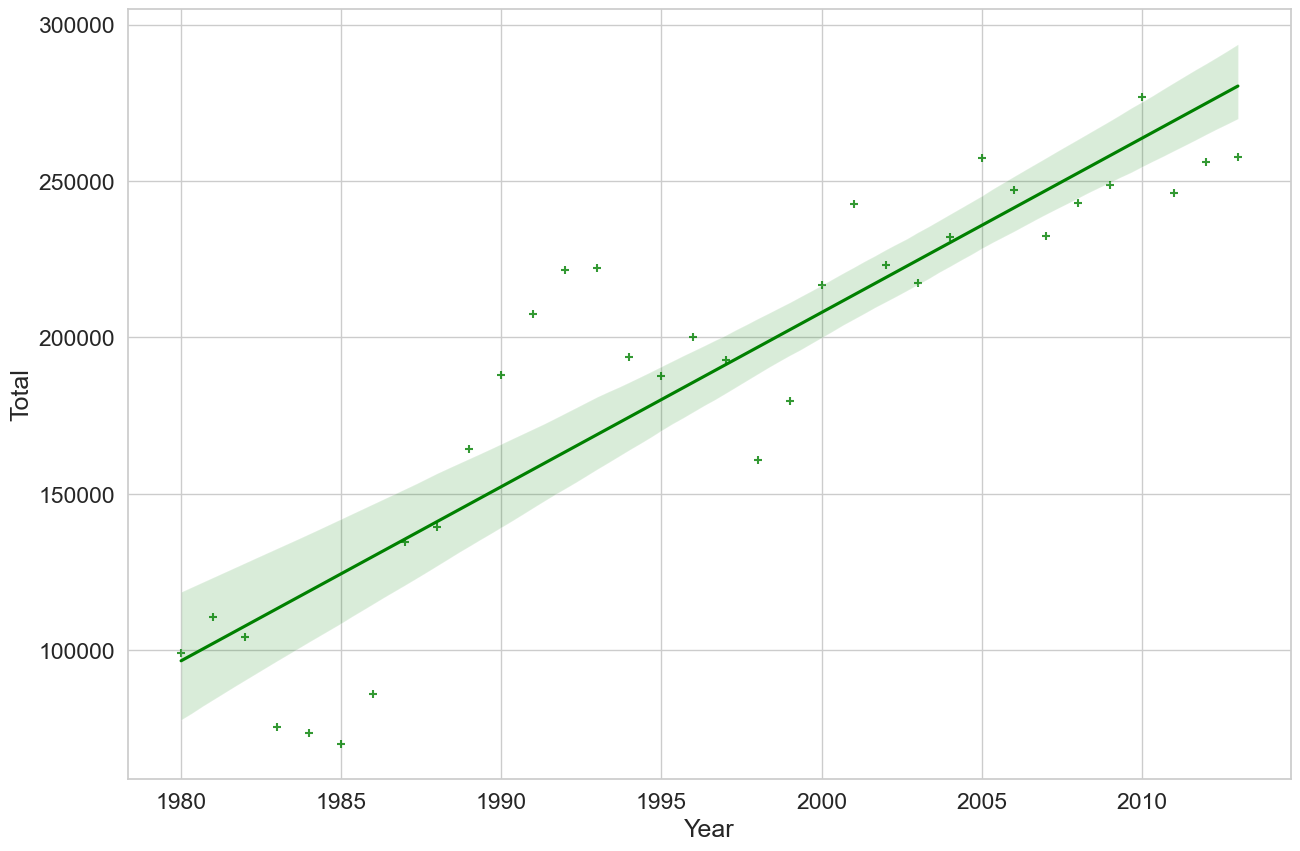

In [158]:
plt.figure(figsize=(15,10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')
ax = sns.regplot(x='Year', y='Total', data=df_total,
                color = 'green', marker = '+')

<Axes: xlabel='Continent', ylabel='count'>

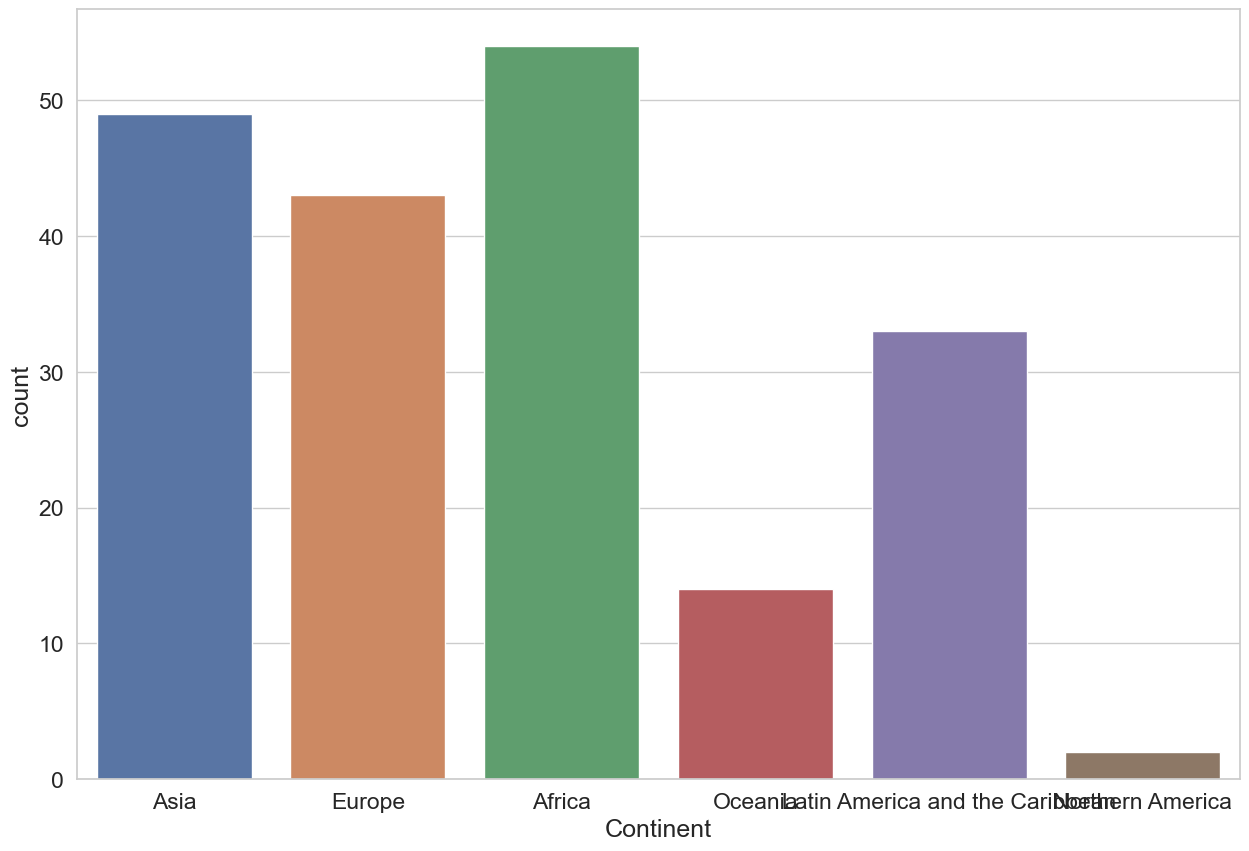

In [160]:
plt.figure(figsize=(15,10))
sns.countplot(x='Continent', data=df_canada)

<Axes: xlabel='Continent', ylabel='Total'>

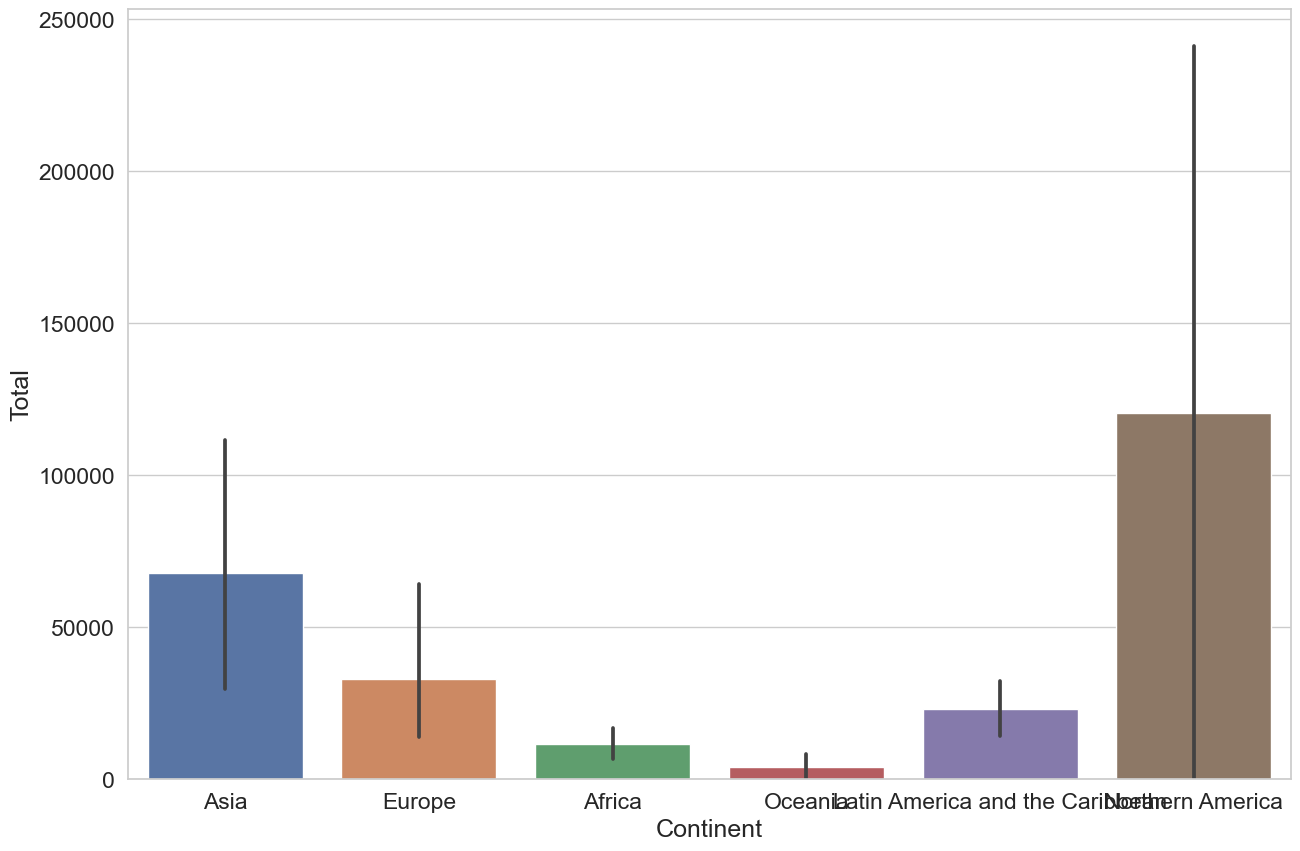

In [162]:
plt.figure(figsize=(15,10))
sns.barplot(x='Continent', y= 'Total', data=df_canada)

In [164]:
df_can1 = df_canada.replace('Latin America and Caribbean', 'L-America')
df_can1 = df_canada.replace('Northern America', 'N-America')

<Axes: xlabel='Continent', ylabel='count'>

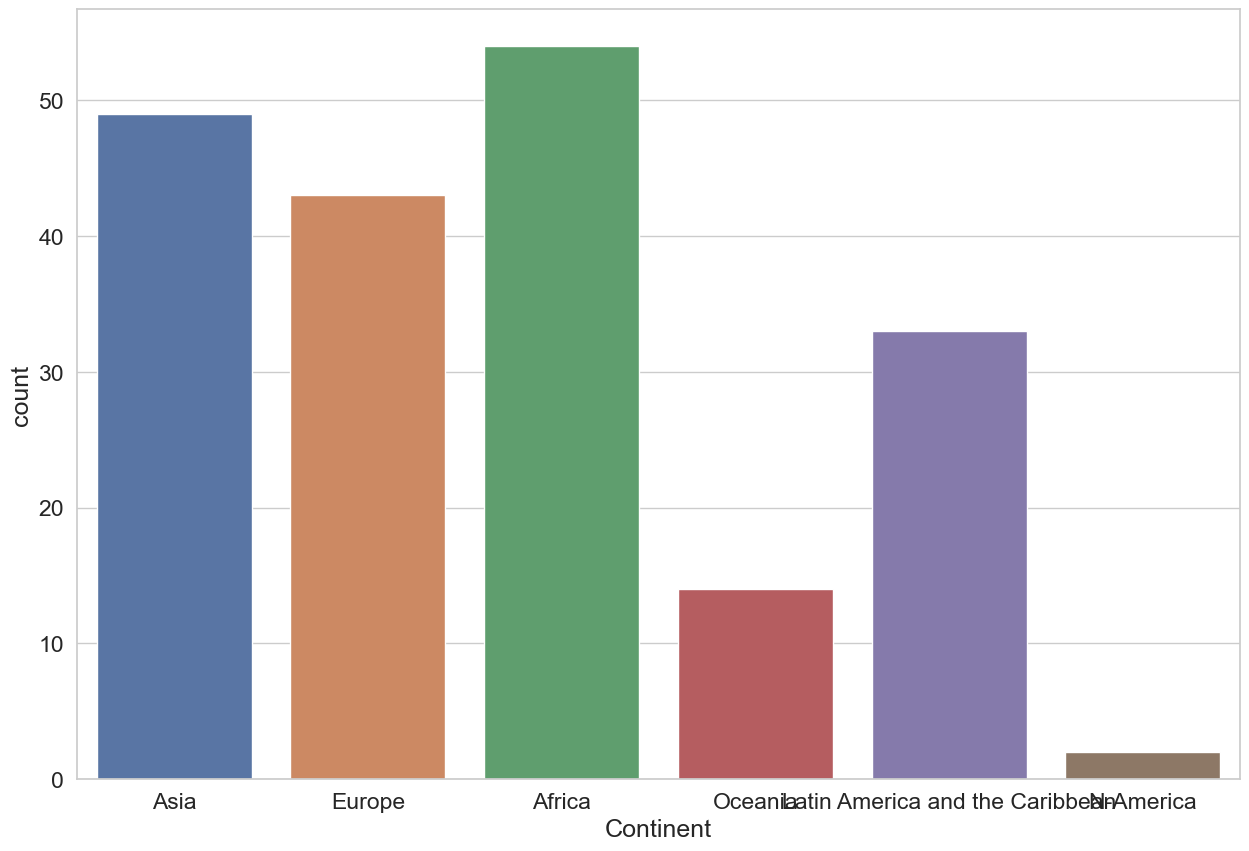

In [166]:
plt.figure(figsize=(15,10))
sns.countplot(x='Continent', data=df_can1)

#### WORD CLOUDS

In [169]:
!pip install wordcloud

In [171]:
import requests
from bs4 import BeautifulSoup

url = "https://www.stiftung-mercator.de/en/fellows/can-sezgin/"
resp = requests.get(url)
soup = BeautifulSoup(resp.text, "html.parser")

# Extract headings and paragraphs
texts = [tag.get_text(separator=" ").strip() for tag in soup.find_all(['h1','h2','h3','p'])]
raw_text = " ".join(texts)

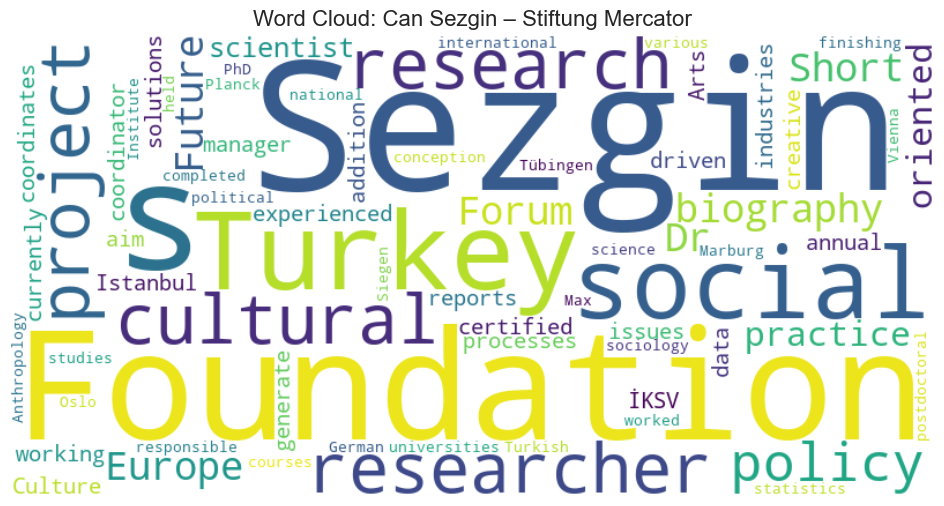

In [173]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Configure and generate without 'collocation'
wc = WordCloud(
    width=800,
    height=400,
    background_color="white"
).generate(raw_text)

# Display it
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud: Can Sezgin – Stiftung Mercator", fontsize=16)
plt.show()

In [175]:
from PIL import Image
import numpy as np
from io import BytesIO

# Load your image from URL and convert to grayscale
img_url = "https://www.stiftung-mercator.de/content/uploads/2022/08/Can-Sezgin_Photo.jpg"
img_resp = requests.get(img_url)
img = Image.open(BytesIO(img_resp.content)).convert("L")  # grayscale for mask

# Convert image to NumPy array
mask = np.array(img)

In [177]:
from wordcloud import WordCloud

wc = WordCloud(
    width=800,
    height=800,
    mode='RGBA',                # enables transparency
    background_color=None,      # transparent!
    mask=mask                   # photo as shape
    # Do NOT use contour_* options with mode='RGBA'
).generate(raw_text)

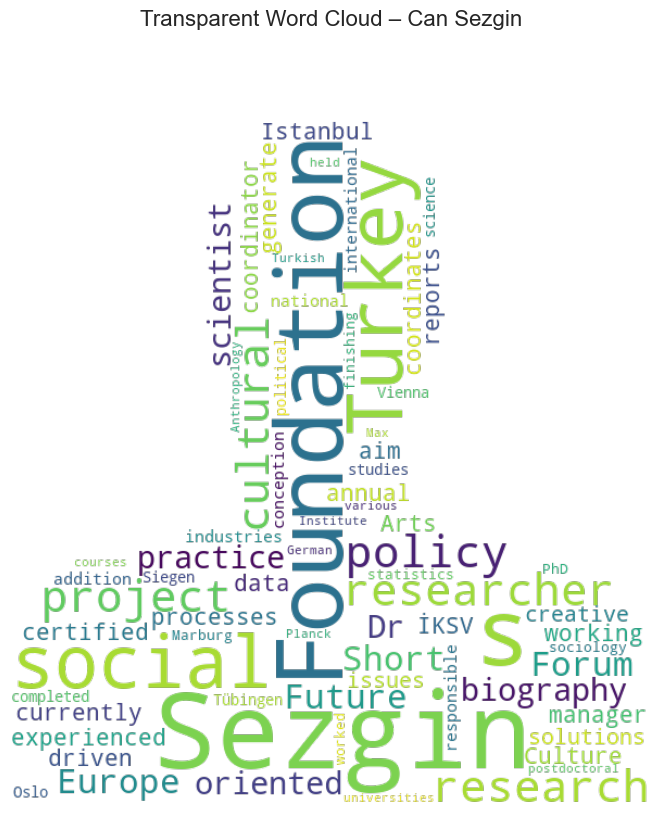

In [179]:
import matplotlib.pyplot as plt

# Show the result
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Transparent Word Cloud – Can Sezgin", fontsize=16)
plt.show()

# Optional: save with transparency
wc.to_file("can_sezgin_wordcloud_transparent.png")

In [181]:
wc.to_file("can_sezgin_wordcloud_transparent.png")

### FOLIUM AND GEOSTATISTICAL ANALYSIS

In [184]:
!pip install folium

In [186]:
import folium

In [188]:
# define the world map
world_map = folium.Map()

# display the world map
world_map

In [190]:
# define the world map centered around
# Canada with low zoom level

world_map = folium.Map(
    location=[56.130, -106.35],
    zoom_start=4
)

# display world map
world_map

In [192]:
#create a canada map
canada_map = folium.Map(
    location=[56.130, -106.35],
    zoom_start=4
)

# add marker to Ontorio
folium.Marker(location=[51.2538,-85.3232],popup='Ontario').add_to(canada_map)

# display world map
canada_map

In [194]:
#create a canada map
canada_map = folium.Map(
    location=[56.130, -106.35],
    zoom_start=4
)

# create a feature group
ontario = folium.map.FeatureGroup()

# style the feature group
ontario.add_child(
    folium.features.CircleMarker(
        [51.25,-85.32], radius = 5,
        color = 'red', fill_color = 'Red'
    )
)

# add the feature group to the map
canada_map.add_child(ontario)

# label the feature group to the map
folium.Marker([51.25,-85.32],
              popup='Ontario').add_to(canada_map)

# display the map
canada_map

In [196]:
# Create a Canada map
canada_map = folium.Map(
    location=[56.130, -106.35],
    zoom_start=4
)

# Define locations
locations = [
    {"location": [45.4215, -75.6989], "popup": "Ottawa"},
    {"location": [53.5461, -113.4938], "popup": "Edmonton"},
    {"location": [49.2827, -123.1207], "popup": "Vancouver"},
]

# Add markers
for loc in locations:
    folium.Marker(
        location=loc["location"],
        popup=loc["popup"]
    ).add_to(canada_map)

# Display map
canada_map

In [198]:
import folium
from folium.plugins import MarkerCluster

# Create a Canada map
canada_map = folium.Map(
    location=[56.130, -106.35],
    zoom_start=4
)

# Create a MarkerCluster object and add it to the map
marker_cluster = MarkerCluster().add_to(canada_map)

# Define locations
locations = [
    {"location": [45.4215, -75.6989], "popup": "Ottawa"},
    {"location": [53.5461, -113.4938], "popup": "Edmonton"},
    {"location": [49.2827, -123.1207], "popup": "Vancouver"},
]

# Add markers to the cluster
for loc in locations:
    folium.Marker(
        location=loc["location"],
        popup=loc["popup"]
    ).add_to(marker_cluster)

# Display the map
canada_map

In [200]:
# San Francisco LAT-LONG
latitude = 37.77
longitude = -122.42

# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
sanfran_map

In [202]:
import pandas as pd
df_incidents = pd.read_csv("/Users/cansezgin/Python-Output/Police_Department_Incidents_-_Previous_Year__2016_.csv")

In [204]:
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [206]:
# get the first 100 crimes in the df_incidents dataframe
limit = 100
df_incidents = df_incidents.iloc[0:limit, :]

In [208]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.vector_layers.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
sanfran_map.add_child(incidents)

In [210]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.vector_layers.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)    
    
# add incidents to map
sanfran_map.add_child(incidents)

In [212]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# loop through the 100 crimes and add each to the map
for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.vector_layers.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(sanfran_map)

# show map
sanfran_map

In [214]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map

#### CHOROPLETH MAPS

for choropleth Maps you need a GeoJson file with entire information

In [218]:
df_canada = pd.read_csv("/Users/cansezgin/Python-Output/canadian_immegration_data.csv")
print(df_canada.shape)

(195, 39)


In [220]:
import urllib.request

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/' + \
      'IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/' + \
      'Data%20Files/world_countries.json'

# Download and save as 'world_countries.json'
urllib.request.urlretrieve(url, 'world_countries.json')
print("GeoJSON file downloaded and saved.")

GeoJSON file downloaded and saved.


In [222]:
import folium
import pandas as pd

# Read the dataset again (if not already done)
df_canada = pd.read_csv("/Users/cansezgin/Python-Output/canadian_immegration_data.csv")
df_canada = df_canada[['Country', 'Total']]

# Create world map
world_map = folium.Map(location=[0, 0], zoom_start=2)

# Use the downloaded file
geo_path = 'world_countries.json'

# Add choropleth layer
folium.Choropleth(
    geo_data=geo_path,
    data=df_canada,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Immigration to Canada (1980–2013)'
).add_to(world_map)

# Display map
world_map